In [ ]:
history


{'input_dim': 10,  'output_dim': 1, 'hidden_units': [200, 200, 200],  'learning_rate': 1e-05, 'learning_rateDecay': 2e-07, 'train_size': 1000, 'batch_size': 1000, 'test_size': 1000, 'x_start': 0, 'x_end': 1, 'epotch': 10000}
Net(
  (layer): Sequential(
    (0): Linear(in_features=10, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): Tanh()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): Tanh()
    (6): Linear(in_features=200, out_features=1, bias=True)
  )
)


/Users/liuchangkundeimac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


train  step: 100 , loss: 36.35396194458008
test   step: 100 , loss: 36.832733154296875
------------------------------------------------
train  step: 200 , loss: 30.399269104003906
test   step: 200 , loss: 30.85252571105957
------------------------------------------------
train  step: 300 , loss: 23.527374267578125
test   step: 300 , loss: 23.947086334228516
------------------------------------------------
train  step: 400 , loss: 16.874576568603516
test   step: 400 , loss: 17.25501823425293
------------------------------------------------
train  step: 500 , loss: 11.581501007080078
test   step: 500 , loss: 11.921741485595703
------------------------------------------------
train  step: 600 , loss: 8.04482650756836
test   step: 600 , loss: 8.349196434020996
------------------------------------------------
train  step: 700 , loss: 5.976309776306152
test   step: 700 , loss: 6.251895904541016
------------------------------------------------
train  step: 800 , loss: 4.875844478607178
test  

train  step: 6100 , loss: 3.858506441116333
test   step: 6100 , loss: 3.9926931858062744
------------------------------------------------
train  step: 6200 , loss: 3.8590664863586426
test   step: 6200 , loss: 3.9915595054626465
------------------------------------------------
train  step: 6300 , loss: 3.8595871925354004
test   step: 6300 , loss: 3.990511894226074
------------------------------------------------
train  step: 6400 , loss: 3.8600528240203857
test   step: 6400 , loss: 3.989535331726074
------------------------------------------------
train  step: 6500 , loss: 3.8604509830474854
test   step: 6500 , loss: 3.988615036010742
------------------------------------------------
train  step: 6600 , loss: 3.860765218734741
test   step: 6600 , loss: 3.9877374172210693
------------------------------------------------
train  step: 6700 , loss: 3.860989570617676
test   step: 6700 , loss: 3.986886501312256
------------------------------------------------
train  step: 6800 , loss: 3.861117

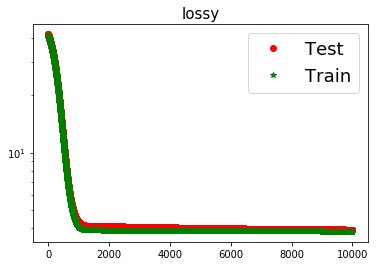

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline
R_variable={}  ### used for saved all parameters and data
R_variable['input_dim']=10
R_variable['output_dim']=1
R_variable['hidden_units']=[200,200,200]
### initialization standard deviation
R_variable['learning_rate']=1e-5
R_variable['learning_rateDecay']=2e-7
R_variable['train_size']=1000;  ### training size
R_variable['batch_size']=R_variable['train_size'] # int(np.floor(R_variable['train_size'])) ### batch size
R_variable['test_size']=R_variable['train_size']  ### test size
R_variable['x_start']=0 #math.pi*3 ### start point of input
R_variable['x_end']=1  #6.28/4 #math.pi*3  ### end point of input
R_variable['epotch'] = 10000
print(R_variable) 

# x = torch.randn(R_variable['train_size']=1000, R_variable['input_dim'])
# y = torch.randn(R_variable['train_size']=1000, R_variable['output_dim']) 
#------------------------------PDE para-----------------------------
n = 1000
R_variable['test_size'] = n
nw = 100
R_variable['boundary_size'] = nw
beta = 1000
if R_variable['input_dim']==1:
    x_train =np.reshape(np.linspace(R_variable['x_start'], R_variable['x_end'], num=R_variable['test_size'],
                                                      endpoint=True),[R_variable['test_size'],1])
    x_test = np.reshape(np.linspace(R_variable['x_start'], R_variable['x_end'], num=R_variable['test_size'],
                                                      endpoint=True),[R_variable['test_size'],1])
    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)
#-------------------Boundry x for PDE function-----------------------
    xBou = np.reshape(np.linspace(R_variable['x_start'], R_variable['x_end'], num=R_variable['test_size'],
                                                      endpoint=True),[R_variable['test_size'],1])
    xBou = xBou.astype(np.float32)
else:
    x_train =np.random.rand(R_variable['test_size'],R_variable['input_dim'])*(R_variable['x_end']-R_variable['x_start'])+R_variable['x_start']
    x_train = x_train.astype(np.float32)
    x_test =np.random.rand(R_variable['test_size'],R_variable['input_dim'])*(R_variable['x_end']-R_variable['x_start'])+R_variable['x_start']
    x_test = x_test.astype(np.float32)
#-------------------Boundry x for PDE function-----------------------
    xBou = np.random.rand(R_variable['boundary_size'],R_variable['input_dim'])*(R_variable['x_end']-R_variable['x_start'])+R_variable['x_start']
    a = np.random.randint(0,R_variable['input_dim'] , 1)
    xBou[:,a] = np.random.randint(0,1)
    xBou = xBou.astype(np.float32)

x_train = torch.tensor(x_train,requires_grad=True)
x_test = torch.tensor(x_test)
xBou = torch.tensor(x_test)

class Net(torch.nn.Module):
    def __init__(self, in_dim,hidden_units,out_dim):
        super(Net, self).__init__()  
        self.layer = torch.nn.Sequential(
            torch.nn.Linear(in_dim,hidden_units[0]), 
            torch.nn.Tanh(),
            torch.nn.Linear(hidden_units[0],hidden_units[1]),
            torch.nn.Tanh(),
            torch.nn.Linear(hidden_units[1],hidden_units[2]),
            torch.nn.Tanh(),
            torch.nn.Linear(hidden_units[2], out_dim)
             )
    def forward(self, x):
        y_pre = self.layer(x)
        return y_pre

    
def get_y_func(xs):
    tmp=0
    x = xs.detach().numpy()
    for ii in range(R_variable['input_dim']):
        tmp += np.sin(x[:,ii:ii+1]) + np.sin(10*x[:,ii:ii+1])
    return torch.tensor(tmp)
    
def  PDE_g_func(xIn):
    tmp = 0
    xIn = xIn.detach().numpy()
    for ii in range(R_variable['input_dim']):
        tmp += np.sin(xIn[:,ii:ii+1]) + 100*np.sin(10*xIn[:,ii:ii+1])
    return torch.tensor(tmp)

def  PDE_gw_func(xBou):
    tmp = 0
    xBou = xBou.detach().numpy()
    for ii in range(R_variable['input_dim']):
        tmp += np.sin(xBou[:,ii:ii+1]) + np.sin(10*xBou[:,ii:ii+1])
    return torch.tensor(tmp)

y_true_test = get_y_func(x_test)


def ploty(ytr,yte,ep):
        
        if R_variable['input_dim']==2:
            # Make data.
            X = np.arange(R_variable['x_start'], R_variable['x_end'], 0.1)
            Y = np.arange(R_variable['x_start'], R_variable['x_end'], 0.1)
            X, Y = np.meshgrid(X, Y)
            xy=np.concatenate((np.reshape(X,[-1,1]),np.reshape(Y,[-1,1])),axis=1)
            Z = np.reshape(get_y_func(xy),[len(X),-1])
            fp = plt.figure()
            ax = fp.gca(projection='3d')
            # Plot the surface.
            surf = ax.plot_surface(X, Y, Z-np.min(Z), cmap=cm.coolwarm,linewidth=0, antialiased=False)
            # Customize the z axis.
            #ax.set_zlim(-2.01, 2.01)
            ax.zaxis.set_major_locator(LinearLocator(5))
            ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
            # Add a color bar which maps values to colors.
            fp.colorbar(surf, shrink=0.5, aspect=5)
            y = ytr.detach().numpy()
            ax.scatter(x_train[:,0], x_train[:,1], y-np.min(y))
#             plt.show()
            plt.savefig('/Users/liuchangkundeimac/Desktop/pictures/picture%d.png'%ep)
    
        if R_variable['input_dim']==1:
            plt.figure()
            ax = plt.gca()
            y1 = yte.detach().numpy()
            y2 = ytr.detach().numpy()
            y3 = y_true_test.numpy()
            test_inputs = np.array(x_test)
            train_inputs = np.array(x_train)
            plt.plot(test_inputs,y1,'ro',label='Test')
            plt.plot(train_inputs,y2,'g*',label='Train')
            plt.plot(test_inputs,y3,'b*',label='True')
            plt.title('g2u',fontsize=15)        
            plt.legend(fontsize=18) 
#             plt.show()
            plt.savefig('/Users/liuchangkundeimac/Desktop/pictures/picture%d.png'%ep)
    
def plotloss(loss_test,loss_train):
    y1 = loss_test
    y2 = loss_train
    plt.figure()
    ax = plt.gca()
    plt.plot(y1,'ro',label='Test')
    plt.plot(y2,'g*',label='Train')
#     ax.set_xscale('log')
    ax.set_yscale('log')                
    plt.legend(fontsize=18)
    plt.title('lossy',fontsize=15)
#     plt.show()
    plt.savefig('/Users/liuchangkundeimac/Desktop/pictures/loss.png')
    
model = Net(R_variable['input_dim'],R_variable['hidden_units'], R_variable['output_dim'])     # define the network
print(model)  # net architecture

def train_test(model):
    loss_train = []
    loss_test = []
    # Construct our loss function and an Optimizer. The call to model.parameters()
    # in the SGD constructor will contain the learnable parameters of the two
    # nn.Linear modules which are members of the model.
    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.Adam(model.parameters(), lr=R_variable['learning_rate'],betas=(0.9, 0.999),eps=1e-08, weight_decay=0)
    for ep in range(R_variable['epotch']):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred_train = model(x_train)
        y_pred_trainB = model(xBou)
        y_pred_test = model.forward(x_test)
# #         # Compute and print loss
        y_train = get_y_func(x_train)
        y_test = get_y_func(x_test)
        z = torch.sum(y_pred_train)
        grad_x = torch.autograd.grad(z,x_train,create_graph=True,retain_graph=True)
        grad_grad_x = torch.autograd.grad(torch.sum(grad_x[0]),x_train,retain_graph=True)
        
        delth = grad_grad_x[0]
        for ii in range(R_variable['input_dim']):
            tmp = 0
            tmp += delth[:,ii:ii+1]
        LSE1 = 1/n * torch.sum((tmp + PDE_g_func(x_train))**2)
        LSE2 =  beta*1/nw*torch.sum((y_pred_trainB-PDE_gw_func(xBou))**2)
        loss1 = LSE1 + LSE2
        lossy1 = 1/(n+nw)*torch.sum((y_pred_train - y_train)**2)
        lossy2 = 1/(n+nw)*torch.sum((y_pred_test - y_test)**2)
        loss2 = torch.sum(1/n*(tmp + PDE_g_func(x_test))**2) + torch.sum(LSE2)
        
        loss_train.append(lossy1)
        loss_test.append(lossy2)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss1.backward(retain_graph=True)
        optimizer.step()
        if (ep+1)%100==0:
            print("train  step: {0} , loss: {1}".format(ep+1,lossy1.item()))       
            print("test   step: {0} , loss: {1}".format(ep+1,lossy2.item()))
            print("------------------------------------------------")
#             ploty(y_pred_train,y_pred_test,ep)
            
    plotloss(loss_test,loss_train)
    
train_test(model)